In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

In [65]:
pylum = pd.read_csv('../data/rauw/illumina/Pylum-level microbiota.csv')
pylum.head(10)

,Sample ID,Firmicutes,Proteobacteria,Actinobacteria,Tenericutes,Bacteroidetes,Armatimonadetes,Spirochaetes,Planctomycetes,Verrucomicrobia,...,Deferribacteres,Dictyoglomi,Balneolaeota,Fibrobacteres,Chlamydiae,Acidobacteria,Kiritimatiellaeota,Nitrospirae,candidate.division.Zixibacteria,Thermodesulfobacteria
0,UAB 17001,52.7866,22.8393,17.7473,0.0325,3.2061,0.0260,0.0195,0.0065,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000
1,UAB 17002,26.8138,55.7956,1.8540,0.0040,0.0161,0.0121,0.0000,0.0020,0.0040,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0020,0.0000,0.0020
2,UAB 17003,60.5104,8.7647,5.1275,0.0060,23.6522,0.0424,0.0089,0.0201,0.0000,...,0.0007,0.0037,0.0000,0.0000,0.0022,0.0000,0.0,0.0007,0.0000,0.0000
3,UAB 17004,29.1573,7.5317,9.0231,0.0746,1.0440,0.0000,0.0746,0.0000,0.0746,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000
4,UAB 17005,76.8142,4.7258,11.9876,0.0407,2.1745,0.0204,0.1375,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0407,0.0000,0.0,0.0051,0.0000,0.0000
5,UAB 17006,74.4002,10.1792,13.0713,0.0112,0.2280,0.0273,0.0273,0.0048,0.0000,...,0.0016,0.0000,0.0000,0.0000,0.0000,0.1076,0.0,0.0000,0.0032,0.0000
6,UAB 17007,63.0646,0.7472,5.3379,21.2978,0.5354,0.0013,0.0039,0.0013,0.0013,...,0.0000,0.0013,0.0000,0.0000,0.0013,0.0000,0.0,0.0000,0.0000,0.0013
7,UAB 17008,73.9986,9.8571,9.1169,0.0171,2.7578,0.0613,0.0951,0.1077,0.0008,...,0.0020,0.0179,0.0004,0.0004,0.0012,0.0000,0.0,0.0000,0.0000,0.0004
8,UAB 17009,64.7139,1.6725,2.9357,0.0051,11.4486,0.0288,0.0826,0.0023,0.0000,...,0.0017,0.0051,0.0000,0.0000,0.0006,0.0000,0.0,0.0006,0.0006,0.0006
9,UAB 17010,59.5769,28.7744,5.7057,0.0856,3.9442,0.0084,0.4506,0.0365,0.0000,...,0.0126,0.0000,0.0000,0.0014,0.0014,0.0000,0.0,0.0000,0.0000,0.0028


## Fertility & Infertility

In [66]:
# split the first column by ' ' if the first value is CON set is as fertile df, otherwise infertile df
pylum['fertility'] = pylum['Sample ID'].str.split(' ').str[0]

# set fertility to 1 if CON, 0 if UAB
pylum['fertility'] = np.where(pylum['fertility'] == 'CON', 1, 0)

#### PCA

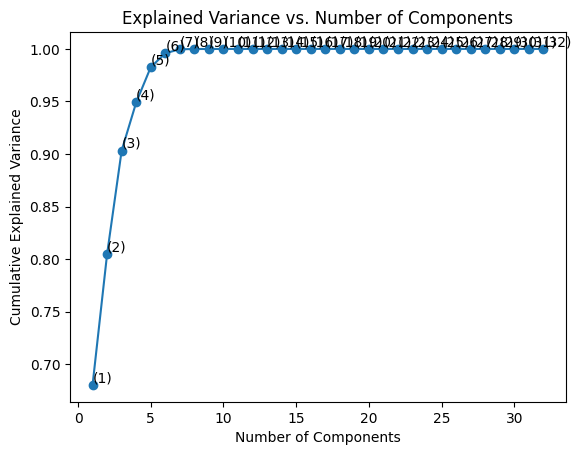

In [67]:
features = pylum.iloc[:, 1:]

# Apply PCA
pca = PCA()
pca.fit(features)

# Plot the explained variance ratio
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Explained Variance vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

# Add text annotations for each point
for i, (num_components, explained_variance) in enumerate(zip(range(1, len(pca.explained_variance_ratio_) + 1), 
                                                               np.cumsum(pca.explained_variance_ratio_))):
    plt.text(num_components, explained_variance, f'({num_components})', ha='left', va='bottom')

plt.show()

In [68]:
# Apply PCA to reduce dimensionality
pca = PCA(n_components=6)  # Choose the number based on the explained variance plot
features_pca = pca.fit_transform(features)

#### KMEANS

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:8

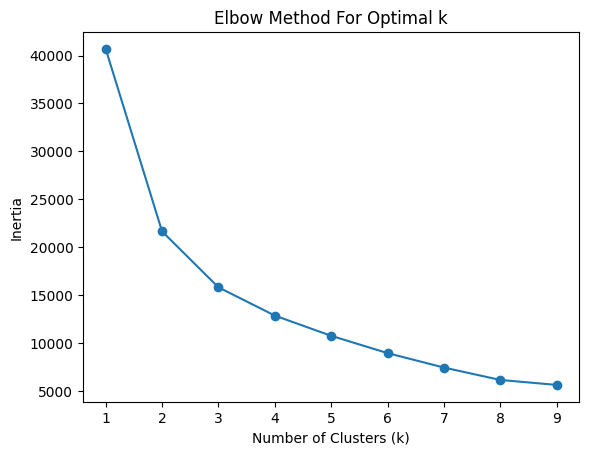

In [69]:
# Initialize a range of k values
k_values = range(1, 10)

# Fit KMeans for each k and calculate the inertia (sum of squared distances to the closest centroid)
inertia = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_pca)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


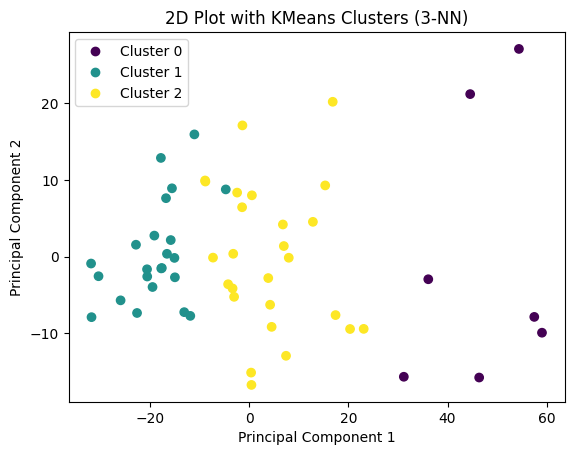

In [70]:
# Fit KMeans clustering on the features
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(features_pca)

# Add the cluster labels to the DataFrame
pylum['cluster'] = cluster_labels

# Plot the 2D data with different colors for each cluster
scatter = plt.scatter(features_pca[:, 0], features_pca[:, 1], c=cluster_labels, cmap='viridis', label='Clusters')
plt.title('2D Plot with KMeans Clusters (3-NN)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(handles=scatter.legend_elements()[0],
           labels=['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.show()

In [71]:
# Add a new column for each combination of cluster and fertility
pylum['cluster_fertility'] = pylum['cluster'].astype(str) + '_' + pylum['fertility'].astype(str)
pylum.head(5)

,Sample ID,Firmicutes,Proteobacteria,Actinobacteria,Tenericutes,Bacteroidetes,Armatimonadetes,Spirochaetes,Planctomycetes,Verrucomicrobia,...,Fibrobacteres,Chlamydiae,Acidobacteria,Kiritimatiellaeota,Nitrospirae,candidate.division.Zixibacteria,Thermodesulfobacteria,fertility,cluster,cluster_fertility
0,UAB 17001,52.7866,22.8393,17.7473,0.0325,3.2061,0.0260,0.0195,0.0065,0.0000,...,0.0,0.0000,0.0,0.0,0.0000,0.0,0.000,0,2,2_0
1,UAB 17002,26.8138,55.7956,1.8540,0.0040,0.0161,0.0121,0.0000,0.0020,0.0040,...,0.0,0.0000,0.0,0.0,0.0020,0.0,0.002,0,0,0_0
2,UAB 17003,60.5104,8.7647,5.1275,0.0060,23.6522,0.0424,0.0089,0.0201,0.0000,...,0.0,0.0022,0.0,0.0,0.0007,0.0,0.000,0,2,2_0
3,UAB 17004,29.1573,7.5317,9.0231,0.0746,1.0440,0.0000,0.0746,0.0000,0.0746,...,0.0,0.0000,0.0,0.0,0.0000,0.0,0.000,0,2,2_0
4,UAB 17005,76.8142,4.7258,11.9876,0.0407,2.1745,0.0204,0.1375,0.0000,0.0000,...,0.0,0.0407,0.0,0.0,0.0051,0.0,0.000,0,1,1_0


#### MLP

In [72]:
X = pylum.drop(['cluster_fertility', 'cluster', 'fertility', 'Sample ID'], axis=1)
y = pylum['cluster_fertility']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
# Initialize the MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(100,50), activation='relu', solver='adam', max_iter=500, random_state=42)

# Train the model
mlp.fit(X_train, y_train)

/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

In [74]:
# Make predictions on the test set
y_pred = mlp.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display additional evaluation metrics
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.58
              precision    recall  f1-score   support

         1_0       0.33      0.33      0.33         3
         1_1       0.00      0.00      0.00         2
         2_0       0.86      1.00      0.92         6
         2_1       0.00      0.00      0.00         1

    accuracy                           0.58        12
   macro avg       0.30      0.33      0.31        12
weighted avg       0.51      0.58      0.54        12

[[1 2 0 0]
 [2 0 0 0]
 [0 0 6 0]
 [0 0 1 0]]


/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


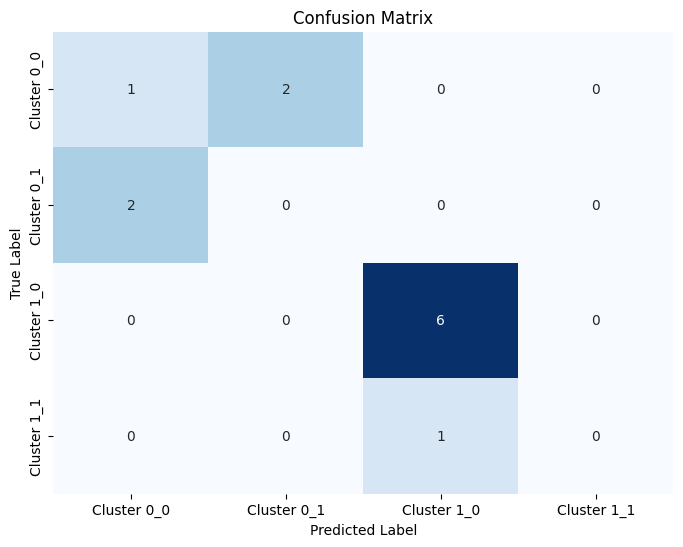

In [75]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Cluster 0_0', 'Cluster 0_1', 'Cluster 1_0', 'Cluster 1_1'],
            yticklabels=['Cluster 0_0', 'Cluster 0_1', 'Cluster 1_0', 'Cluster 1_1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [76]:
# save the MLP model
filename = 'pylum_mlp'
pickle.dump(mlp, open(filename, 'wb'))

### ADDING SOME METADATA

In [77]:
clinical = pd.read_csv('../data/rauw/illumina/Sample info + Sperm quality.csv')

clinical.head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,"Life style, intake habits, clinical history",...,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Sperm DNA integrity,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,Sample ID,Sample collection date,City of birth,City of residence 1,City of residence 2,Age,Clinical status,Smoker,Alcohol intake,Caffeine (mg/day),...,pH,Seminal viscosity (cps),Normed sORP (mV/10^6 sperm/ml),CMA3+ (%),TUNEL+ (%),Alkaline comet OTM,Neutral comet OTM,Alkaline comet (%),Neutral comet (%),Shannon Index
1,UAB 17001,2017-07-25 00:00:00,Malaga,[IB] Alcudia,NaN,40,Infertile,0,Sporadic,388,...,7.5,6.3096,0.38149038461538454,50.75,25.79,0.765,0.6,31,82,2.57552
2,UAB 17002,2017-07-12 00:00:00,[IB] Palma,[IB] Palma,NaN,42,Infertile,0,Frequent,156,...,7.5,4.997999999999999,0.6411062836391933,23.25,42.49,0.885,0.595,33,72,3.42725
3,UAB 17003,2017-07-21 00:00:00,[VAL] València,[IB] Palma,NaN,38,Infertile,NaN,NaN,NaN,...,8.4,5.591999999999999,1.2580281690140847,40.85,35.45,0.89,0.625,28,78,2.60476
4,UAB 17004,2017-08-21 00:00:00,[Bulgària] Sliven,[IB] Campos,NaN,48,Infertile,NaN,NaN,NaN,...,8.3,8.6112,NaN,37.25,29.42,1.09,1.105,64,86,2.93109


In [78]:
# Set the second row as the column names
clinical.columns = clinical.iloc[0]

# Drop the first and second rows (index 0 and 1)
clinical = clinical.iloc[1:, :]

# Drop the last row 
clinical = clinical.iloc[:-1, :]

# Reset the index
clinical.reset_index(drop=True, inplace=True)
clinical.head(5)

,Sample ID,Sample collection date,City of birth,City of residence 1,City of residence 2,Age,Clinical status,Smoker,Alcohol intake,Caffeine (mg/day),...,pH,Seminal viscosity (cps),Normed sORP (mV/10^6 sperm/ml),CMA3+ (%),TUNEL+ (%),Alkaline comet OTM,Neutral comet OTM,Alkaline comet (%),Neutral comet (%),Shannon Index
0,UAB 17001,2017-07-25 00:00:00,Malaga,[IB] Alcudia,NaN,40,Infertile,0,Sporadic,388,...,7.5,6.3096,0.38149038461538454,50.75,25.79,0.765,0.6,31,82,2.57552
1,UAB 17002,2017-07-12 00:00:00,[IB] Palma,[IB] Palma,NaN,42,Infertile,0,Frequent,156,...,7.5,4.997999999999999,0.6411062836391933,23.25,42.49,0.885,0.595,33,72,3.42725
2,UAB 17003,2017-07-21 00:00:00,[VAL] València,[IB] Palma,NaN,38,Infertile,NaN,NaN,NaN,...,8.4,5.591999999999999,1.2580281690140847,40.85,35.45,0.89,0.625,28,78,2.60476
3,UAB 17004,2017-08-21 00:00:00,[Bulgària] Sliven,[IB] Campos,NaN,48,Infertile,NaN,NaN,NaN,...,8.3,8.6112,NaN,37.25,29.42,1.09,1.105,64,86,2.93109
4,UAB 17005,2017-08-21 00:00:00,Barcelona,[IB] Palma,NaN,39,Infertile,0,Never,0,...,7.7,4.548,NaN,19.5,40.46,1.285,0.26,30,46,2.47794


In [79]:
clinical.isna().sum()

0
Sample ID                          0
Sample collection date             0
City of birth                      0
City of residence 1                0
City of residence 2               45
Age                                0
Clinical status                    0
Smoker                             5
Alcohol intake                     5
Caffeine (mg/day)                  5
Radiation exposure                 0
Chemical exposure                  0
Diseases                          41
Antibiotics (last month)          44
Abstinence (days)                  7
Volume (mL)                        1
Sperm concentration (M/ml)         3
Total sperm number (x10^6)         3
Total motility (%)                 0
Progressive motility (%)           3
Normal morfology (%)              12
pH                                 1
Seminal viscosity (cps)            2
Normed sORP (mV/10^6 sperm/ml)     6
CMA3+ (%)                          1
TUNEL+ (%)                         2
Alkaline comet OTM                 0

In [80]:
clinical = clinical.drop(['Sample collection date', 'City of residence 2', 
                                      'Clinical status', 'Diseases', 'Antibiotics (last month)',
                                      'Abstinence (days)', 'Normal morfology (%)',
                                      'City of birth', 'City of residence 1'], axis=1)

In [81]:
clinical.isna().sum()

0
Sample ID                         0
Age                               0
Smoker                            5
Alcohol intake                    5
Caffeine (mg/day)                 5
Radiation exposure                0
Chemical exposure                 0
Volume (mL)                       1
Sperm concentration (M/ml)        3
Total sperm number (x10^6)        3
Total motility (%)                0
Progressive motility (%)          3
pH                                1
Seminal viscosity (cps)           2
Normed sORP (mV/10^6 sperm/ml)    6
CMA3+ (%)                         1
TUNEL+ (%)                        2
Alkaline comet OTM                0
Neutral comet OTM                 0
Alkaline comet (%)                0
Neutral comet (%)                 0
Shannon Index                     0
dtype: int64

In [82]:
# Know which row have NaN values in three columns
clinical[clinical.isna().any(axis=1)]

,Sample ID,Age,Smoker,Alcohol intake,Caffeine (mg/day),Radiation exposure,Chemical exposure,Volume (mL),Sperm concentration (M/ml),Total sperm number (x10^6),...,pH,Seminal viscosity (cps),Normed sORP (mV/10^6 sperm/ml),CMA3+ (%),TUNEL+ (%),Alkaline comet OTM,Neutral comet OTM,Alkaline comet (%),Neutral comet (%),Shannon Index
2,UAB 17003,38,NaN,NaN,NaN,1,1,2.2,48409090.90909091,106.5,...,8.4,5.591999999999999,1.2580281690140847,40.85,35.45,0.89,0.625,28,78,2.60476
3,UAB 17004,48,NaN,NaN,NaN,0,0,3.7,NaN,NaN,...,8.3,8.6112,NaN,37.25,29.42,1.09,1.105,64,86,2.93109
4,UAB 17005,39,0,Never,0,0,0,5.7,NaN,NaN,...,7.7,4.548,NaN,19.5,40.46,1.285,0.26,30,46,2.47794
5,UAB 17006,40,NaN,NaN,NaN,0,0,3.3,14181818.181818184,46.8,...,8.3,4.3644,0.8496794871794872,23.25,69.69,1.49,0.595,55,54,1.58201
6,UAB 17007,34,1,Sporadic,464,0,0,4.7,94234042.55319148,442.9,...,7.3,NaN,NaN,33.56,29.51,1.135,0.59,30,78,1.94317
7,UAB 17008,47,1,Sporadic,369,0,0,0.5,17800000,8.9,...,7.5,7.849199999999999,1.2865168539325842,NaN,NaN,1.23,1.295,60,90,2.34287
13,UAB 17015,41,0,Sporadic,116,0,0,4.7,13829787.234042553,65,...,8,NaN,NaN,21.46,39.66,0.985,0.67,44,65,2.05722
14,UAB 17016,39,0,Frequent,384,0,0,2.9,34827586.20689655,101,...,8.3,37.68,NaN,32.25,31.15,0.8,0.63,31,79,2.34492
17,UAB 17019,47,0,Sporadic,123,0,0,0.5,22000000,11,...,8,4.0043999999999995,5.968181818181819,51.8,NaN,0.48,0.59,35,67,2.06768
19,UAB 17021,36,NaN,NaN,NaN,0,0,2.7,31481481.481481478,85,...,8,7.369199999999999,1.1975294117647062,13.4,13.16,0.915,0.695,47,71,2.88404


In [83]:
# Drop those rows that have NaN values in the columns of Smoker, Alcohol and Caffeine
clinical = clinical.dropna(axis=0, subset=['Smoker', 'Alcohol intake', 'Caffeine (mg/day)'])

In [84]:
clinical.isna().sum()

0
Sample ID                         0
Age                               0
Smoker                            0
Alcohol intake                    0
Caffeine (mg/day)                 0
Radiation exposure                0
Chemical exposure                 0
Volume (mL)                       1
Sperm concentration (M/ml)        2
Total sperm number (x10^6)        2
Total motility (%)                0
Progressive motility (%)          2
pH                                1
Seminal viscosity (cps)           2
Normed sORP (mV/10^6 sperm/ml)    5
CMA3+ (%)                         1
TUNEL+ (%)                        2
Alkaline comet OTM                0
Neutral comet OTM                 0
Alkaline comet (%)                0
Neutral comet (%)                 0
Shannon Index                     0
dtype: int64

In [85]:
# Create a vector with all the columns to convert to numeric
numeric_cols = ['Volume (mL)', 'Sperm concentration (M/ml)', 'Total sperm number (x10^6)', 
                'Progressive motility (%)', 'pH', 'Seminal viscosity (cps)', 'Normed sORP (mV/10^6 sperm/ml)', 
                'CMA3+ (%)', 'TUNEL+ (%)']

# Convert the columns to numeric using pd.to_numeric and errors='coerce'
clinical[numeric_cols] = clinical[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Interpolate the missing values of those columns
clinical[numeric_cols] = clinical[numeric_cols].interpolate(method='linear', limit_direction='forward')

In [86]:
clinical.isna().sum()

0
Sample ID                         0
Age                               0
Smoker                            0
Alcohol intake                    0
Caffeine (mg/day)                 0
Radiation exposure                0
Chemical exposure                 0
Volume (mL)                       0
Sperm concentration (M/ml)        0
Total sperm number (x10^6)        0
Total motility (%)                0
Progressive motility (%)          0
pH                                0
Seminal viscosity (cps)           0
Normed sORP (mV/10^6 sperm/ml)    0
CMA3+ (%)                         0
TUNEL+ (%)                        0
Alkaline comet OTM                0
Neutral comet OTM                 0
Alkaline comet (%)                0
Neutral comet (%)                 0
Shannon Index                     0
dtype: int64

In [87]:
# Get the categories of the column Alcohol intake
clinical['Alcohol intake'].unique()

array(['Sporadic', 'Frequent', 'Never'], dtype=object)

In [88]:
# Convert categorical labels to numbers in the Alcohol intake columns that have 3 categories
clinical['Alcohol intake'] = clinical['Alcohol intake'].map({'Never': 0, 'Sporadic': 1, 'Frequent': 2})

In [89]:
# Get the shape of the DataFrame
clinical.shape

(51, 22)

In [90]:
# Join clinical with pylum using Sample ID
pylum_clinical = pd.merge(clinical, pylum, on='Sample ID')
pylum_clinical.head(5)

,Sample ID,Age,Smoker,Alcohol intake,Caffeine (mg/day),Radiation exposure,Chemical exposure,Volume (mL),Sperm concentration (M/ml),Total sperm number (x10^6),...,Fibrobacteres,Chlamydiae,Acidobacteria,Kiritimatiellaeota,Nitrospirae,candidate.division.Zixibacteria,Thermodesulfobacteria,fertility,cluster,cluster_fertility
0,UAB 17001,40,0,1,388,0,0,2.3,1.356522e+08,312.000,...,0.0000,0.0000,0.0,0.0,0.0000,0.0,0.0000,0,2,2_0
1,UAB 17002,42,0,2,156,0,0,1.3,1.186231e+08,154.210,...,0.0000,0.0000,0.0,0.0,0.0020,0.0,0.0020,0,0,0_0
2,UAB 17005,39,0,0,0,0,0,5.7,1.064286e+08,298.555,...,0.0000,0.0407,0.0,0.0,0.0051,0.0,0.0000,0,1,1_0
3,UAB 17007,34,1,1,464,0,0,4.7,9.423404e+07,442.900,...,0.0000,0.0013,0.0,0.0,0.0000,0.0,0.0013,0,1,1_0
4,UAB 17008,47,1,1,369,0,0,0.5,1.780000e+07,8.900,...,0.0004,0.0012,0.0,0.0,0.0000,0.0,0.0004,0,1,1_0


In [91]:
# Know the columns with nan values
pylum_clinical.columns[pylum_clinical.isna().any()].tolist()

[]

##### PCA

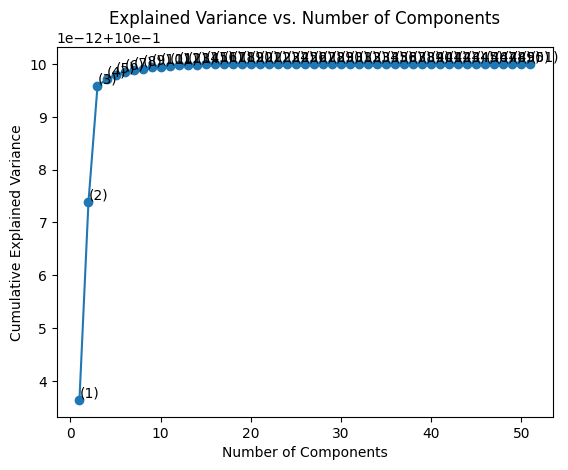

In [92]:
features = pylum_clinical.iloc[:, 1:]

# Apply PCA
pca = PCA()
pca.fit(features)

# Plot the explained variance ratio
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Explained Variance vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

# Add text annotations for each point
for i, (num_components, explained_variance) in enumerate(zip(range(1, len(pca.explained_variance_ratio_) + 1), 
                                                               np.cumsum(pca.explained_variance_ratio_))):
    plt.text(num_components, explained_variance, f'({num_components})', ha='left', va='bottom')

plt.show()

In [93]:
# Apply PCA to reduce dimensionality
pca = PCA(n_components=6)  # Choose the number based on the explained variance plot
features_pca = pca.fit_transform(features)

#### KMEANS

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:8

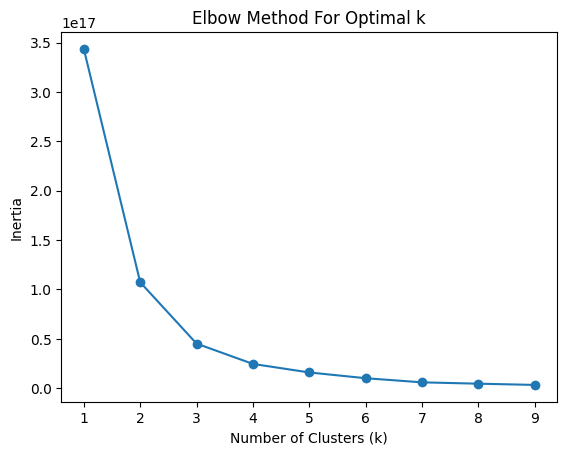

In [94]:
# Initialize a range of k values
k_values = range(1, 10)

# Fit KMeans for each k and calculate the inertia (sum of squared distances to the closest centroid)
inertia = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_pca)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


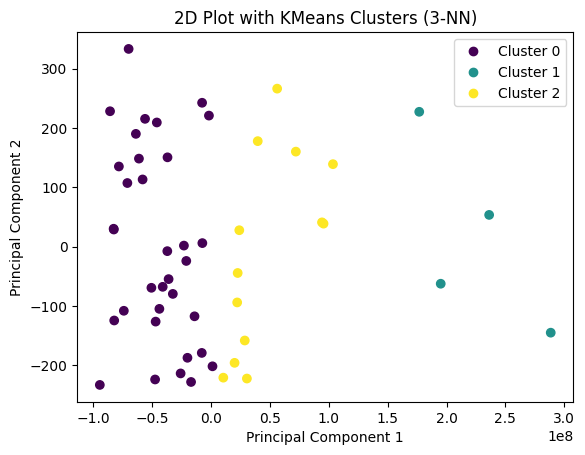

In [95]:
# Fit KMeans clustering on the features
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(features_pca)

# Add the cluster labels to the DataFrame
pylum_clinical['cluster'] = cluster_labels

# Plot the 2D data with different colors for each cluster
scatter = plt.scatter(features_pca[:, 0], features_pca[:, 1], c=cluster_labels, cmap='viridis', label='Clusters')
plt.title('2D Plot with KMeans Clusters (3-NN)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(handles=scatter.legend_elements()[0],
           labels=['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.show()

In [96]:
# Add a new column for each combination of cluster and fertility
pylum_clinical['cluster_fertility'] = pylum_clinical['cluster'].astype(str) + '_' + pylum_clinical['fertility'].astype(str)
pylum_clinical.head(5)

,Sample ID,Age,Smoker,Alcohol intake,Caffeine (mg/day),Radiation exposure,Chemical exposure,Volume (mL),Sperm concentration (M/ml),Total sperm number (x10^6),...,Fibrobacteres,Chlamydiae,Acidobacteria,Kiritimatiellaeota,Nitrospirae,candidate.division.Zixibacteria,Thermodesulfobacteria,fertility,cluster,cluster_fertility
0,UAB 17001,40,0,1,388,0,0,2.3,1.356522e+08,312.000,...,0.0000,0.0000,0.0,0.0,0.0000,0.0,0.0000,0,2,2_0
1,UAB 17002,42,0,2,156,0,0,1.3,1.186231e+08,154.210,...,0.0000,0.0000,0.0,0.0,0.0020,0.0,0.0020,0,2,2_0
2,UAB 17005,39,0,0,0,0,0,5.7,1.064286e+08,298.555,...,0.0000,0.0407,0.0,0.0,0.0051,0.0,0.0000,0,2,2_0
3,UAB 17007,34,1,1,464,0,0,4.7,9.423404e+07,442.900,...,0.0000,0.0013,0.0,0.0,0.0000,0.0,0.0013,0,0,0_0
4,UAB 17008,47,1,1,369,0,0,0.5,1.780000e+07,8.900,...,0.0004,0.0012,0.0,0.0,0.0000,0.0,0.0004,0,0,0_0


#### MLP

In [97]:
X = pylum_clinical.drop(['cluster_fertility', 'cluster', 'fertility', 'Sample ID'], axis=1)
y = pylum_clinical['cluster_fertility']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
# Initialize the MLP Classifier
mlp_metadata = MLPClassifier(hidden_layer_sizes=(100,50), activation='relu', solver='adam', max_iter=500, random_state=42)

# Train the model
mlp_metadata.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

In [99]:
# Make predictions on the test set
y_pred = mlp_metadata.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display additional evaluation metrics
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.09
              precision    recall  f1-score   support

         0_0       0.00      0.00      0.00         7
         0_1       0.00      0.00      0.00         3
         2_0       0.09      1.00      0.17         1

    accuracy                           0.09        11
   macro avg       0.03      0.33      0.06        11
weighted avg       0.01      0.09      0.02        11

[[0 0 7]
 [0 0 3]
 [0 0 1]]


/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


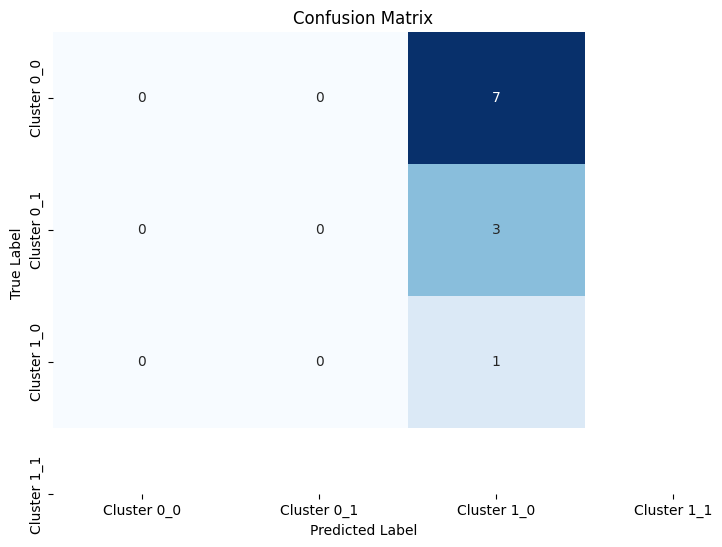

In [100]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Cluster 0_0', 'Cluster 0_1', 'Cluster 1_0', 'Cluster 1_1'],
            yticklabels=['Cluster 0_0', 'Cluster 0_1', 'Cluster 1_0', 'Cluster 1_1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()